11501568/11490434 [==============================] - 0s 0us/step
training set (60000, 28, 28)
test set (10000, 28, 28)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 gaussian_noise (GaussianNoi  (None, 784)              0         
 se)                                                             
                                                                 
 dense (Dense)               (None, 1024)              803840    
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 gaussian_noise_1 (GaussianN  (None, 1024)             0         
 oi

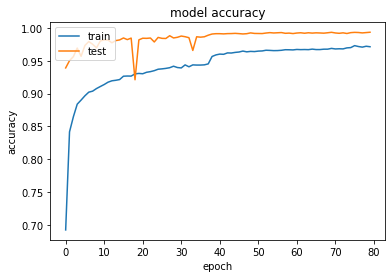

In [1]:
from __future__ import print_function


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape
from keras.layers import BatchNormalization as BN
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers import GaussianNoise as GN
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler as LRS

from keras.preprocessing.image import ImageDataGenerator


batch_size = 100
epochs = 80
num_classes=10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)


## Data Augmentation with an ImageGenerator
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=False)


## Model, note the reshape
model = Sequential()
model.add(Reshape(target_shape=(784,), input_shape=(28,28,1)))
model.add(GN(0.3))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))

model.add(Dense(num_classes, activation='softmax'))

model.summary()
##

adam=Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)
history=model.fit(datagen.flow(x_train, y_train,batch_size=batch_size),
                            steps_per_epoch=len(x_train) / batch_size, 
                            epochs=epochs,
                            validation_data=(x_test, y_test),
                            callbacks=[reduce_lr],
                            verbose=1)


score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
